This code is written to compare the alignment of the T2* data from across the different acquisition sessions. The idea is to check whether CNR differences across contrasts and sequences could be due to misalignment issues.

K. Garner - 2020

In [15]:
import matplotlib.pyplot as plt
import nilearn.plotting as niplt # for debugging
import nilearn.image as img
import pandas as pd
import nibabel as nib
import os

In [19]:
# define subject paths and variables for the session
Basedir =  "/scratch/qbi/uqkgarn1/"
T2 = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/sub-%s/ses-%s/func/sub-%s_ses-%s_task-learnAtt_acq-TR%s_space-T1w_desc-mean_bold.nii.gz'
T1 = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/sub-%s/anat/sub-%s_desc-preproc_T1w.nii.gz'
mv = 30 # maximum value when plotting
subs = ['02', '05'] # subject numbers to be plotted
sub_coords = [[28,22,-20],[-14, 43, 7]] # coordinates to slice image
figsz = [12, 12] # fig size in inches
nrow = 3 # for subplots
ncol = 1

In [20]:
def plotT2(T2, T1, sub, sess, TR, coords, axes=None):
    T2im = T2 % (sub, sess, sub, sess, TR)
    T1 = T1 % (sub, sub)
    img = niplt.plot_epi(epi_img=T2im,                         
                          cut_coords=coords, 
                          colorbar=True, 
                          axes=axes,
                          annotate=True,
                          draw_cross=False,
                          title= 'sub %s, sess %s, TR %s' % (sub, sess, TR)) 
    return img.add_edges(T1)

**For a random participant, plot the T2* images for each session of the TR1920 sequence**

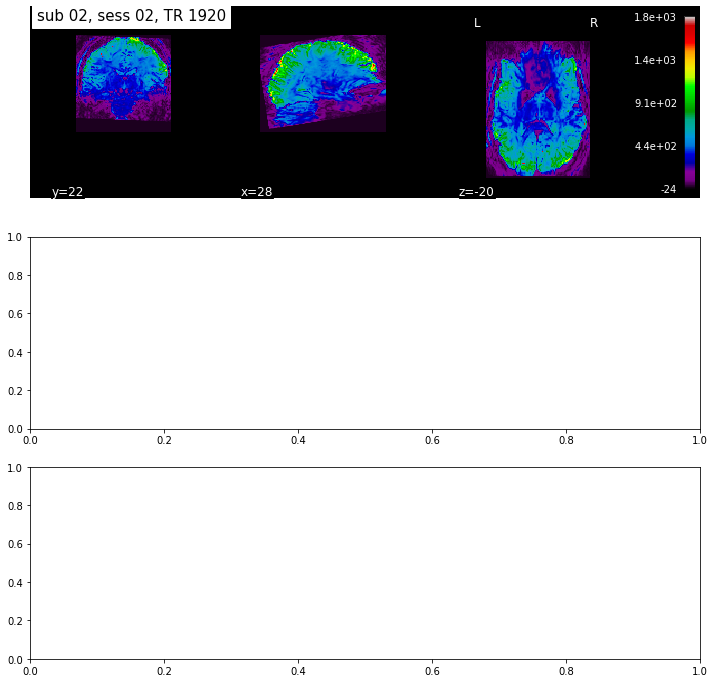

In [21]:
fa, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotT2(T2, T1, subs[0], '02', '1920', sub_coords[0], axes=ax1)